### ASTR 3890 - Selected Topics: Data Science for Large Astronomical Surveys (Spring 2022)
***N. Hernitschek***
___

# Homework 3
### Due: Monday, Feb 14th at 11.00am CST

The completed lecture notebook must also be submitted by 11:00am Central Time on Feb 14th.

---

## Problem 1

Consider a family with two children. Assume that the probability of females and males being born is equal, i.e. $p(F)=0.5$ and $p(M)=0.5$. Remember that "given" means your calculation is conditioned on some already fixed data or outcome. 

1) What is the probability of one male and one female **GIVEN** that the first child is male. 

2) What is the probability of two females **GIVEN** that at least one child is female.

3) What is the probability of two females **GIVEN** that the older child is female.

You will find it easiest to answer these questions by sketching a "tree diagram" to visualize the options for the oldest child, and the branching options for the youngest child. 

Either write your solution as Markdown/Latex below, or paste in a scanned image of your handwritten solution.

### Solution

1. Given the first child is male, there are two possibilities: male-male, male-female. Therefore, there is a 50% chance that
    the other child is female.
  
2. Given that at least one child is female, there are three possibilities: female-male, female-female, male-female.
    Therefore, there is a 33% chance for two females, given one is female.
   
3. This problem is similar to number 1 in that the first child is female. There are two possibilities: female-male,
    female-female. Therefore, there is a 50% chance for two females.

## Problem 2

The data in hw3_populations.txt (source: scipy-lectures.org) describes the populations of hares and lynxes (and carrots) in northern Canada during 20 years:


create a Python script to

1. plot hw3_populations.txt (using matlab)


2. calculate and output:

    a) The mean, median and std of the populations of each species for the years in the period.
    
    b) The year each species had the largest population.
    
    c) The species that has the largest population for each year. (Hint: argsort & fancy indexing of np.array(['H', 'L', 'C']))
    
    d) The years were any of the populations is above 50000. (Hint: comparisons and np.any)
    
    e) The top 2 years for each species when they had the lowest populations. (Hint: argsort, fancy indexing)
    
    f) Compare (plot) the change in hare population (see help(np.gradient)) and the number of lynxes. Check correlation (see help(np.corrcoef)).



### Solution



Text(0, 0.5, 'Population')

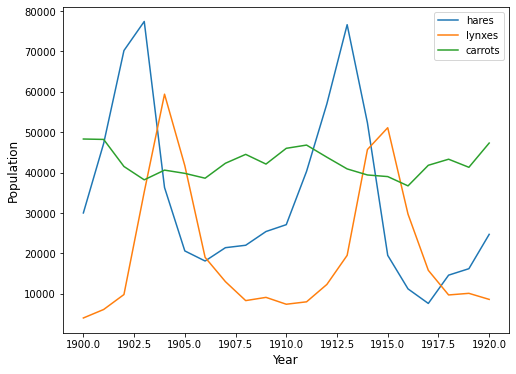

In [26]:
# 1

import numpy as np
from matplotlib import pyplot as plt

data = np.loadtxt('hw3_populations.txt')

y = data[:,0]
h = data[:,1]
l = data[:,2]
c = data[:,3]

fig,ax = plt.subplots(figsize=(8, 6))
ax.plot(y, h, label='hares')
ax.plot(y, l, label='lynxes')
ax.plot(y, c, label='carrots')
plt.legend()
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Population', fontsize=12)

In [46]:
# 2a, 2b

mean_hares = np.mean(h)
median_hares = np.median(h)
std_hares = np.std(h)

print('Descriptive stats for hares population: Mean-', round(mean_hares), 'Median-', round(median_hares), 'Std-'
      , round(std_hares))

mean_lynxes = np.mean(l)
median_lynxes = np.median(l)
std_lynxes = np.std(l)

print('Descriptive stats for lynxes population: Mean-', round(mean_lynxes), 'Median-', round(median_lynxes)
      , 'Std-', round(std_lynxes))

mean_carrots = np.mean(c)
median_carrots = np.median(c)
std_carrots = np.std(c)

print('Descriptive stats for carrots population: Mean-', round(mean_carrots), 'Median-', round(median_carrots)
      , 'Std-', round(std_carrots))

hmax = y[np.argmax(h)]
lmax = y[np.argmax(l)]
cmax = y[np.argmax(c)]

print ('\nYear with max population: Hares-', round(hmax), 'Lynxes-', round(lmax), 'Carrots-', round(cmax))

Descriptive stats for hares population: Mean- 34081 Median- 25400 Std- 20898
Descriptive stats for lynxes population: Mean- 20167 Median- 12300 Std- 16255
Descriptive stats for carrots population: Mean- 42400 Median- 41800 Std- 3323

Year with max population: Hares- 1903 Lynxes- 1904 Carrots- 1900


In [99]:
# 2c

print('Largest population in each year:')

maxes = np.argmax(data, axis=1)

year = 1900
for i in maxes:
    if (i == 1):
        print(year, 'Hares')
    if (i==2):
        print(year, 'Lynxes')
    if (i==3):
        print(year, 'Carrots')
    year = year + 1

Largest population in each year:
1900 Carrots
1901 Carrots
1902 Hares
1903 Hares
1904 Lynxes
1905 Lynxes
1906 Carrots
1907 Carrots
1908 Carrots
1909 Carrots
1910 Carrots
1911 Carrots
1912 Hares
1913 Hares
1914 Hares
1915 Lynxes
1916 Carrots
1917 Carrots
1918 Carrots
1919 Carrots
1920 Carrots


In [103]:
# 2d

print('Years where any of the populations if above 50,000:')

# We can do this by testing against the maximum value of each row.
maxes2 = np.amax(data, axis=1)

year2 = 1900
for i in maxes2:
    if (i > 50000):
        print(year2)
    year2 = year2 + 1

Years where any of the populations if above 50,000:
1902
1903
1904
1912
1913
1914
1915


In [125]:
# 2e

h_sort = data[np.argsort(data[:, 1])]
h_min = h_sort[0, 0]
h_min2 = h_sort[1, 0]

print('Lowest hare population years:', round(h_min), 'and', round(h_min2))

l_sort = data[np.argsort(data[:, 2])]
l_min = l_sort[0, 0]
l_min2 = l_sort[1, 0]

print('Lowest lynx population years:', round(l_min), 'and', round(l_min2))

c_sort = data[np.argsort(data[:, 3])]
c_min = c_sort[0, 0]
c_min2 = c_sort[1, 0]

print('Lowest carrot population years:', round(c_min), 'and', round(c_min2))

Lowest hare population years: 1917 and 1916
Lowest lynx population years: 1900 and 1901
Lowest carrot population years: 1916 and 1903


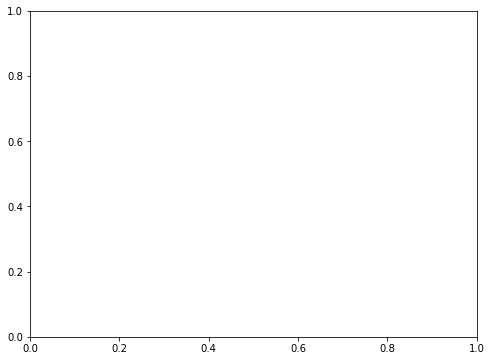

In [140]:
# 2f - This question is interesting but I did not give myself enough time to complete it! :(

h_change = np.gradient(h)

fig2,ax2 = plt.subplots(figsize=(8, 6))